In [14]:
# Imports
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import password

In [2]:
# Query
query = "SELECT s.emp_no, s.salary, t.title FROM salaries AS s JOIN titles \
        AS t ON s.emp_no = t.emp_no ORDER BY s.emp_no;"

# Create engine and connection
engine = create_engine('postgresql://postgres:'+ password + '@localhost:5432/employee_db')
conn = engine.connect()

In [3]:
# Read from the database
data = pd.read_sql(query, conn)
data.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer


In [32]:
# Average salary by employee title
grouped_data = round(data.groupby('title')['salary'].mean(), 2)
grouped_data

title
Assistant Engineer    48493.20
Engineer              48539.78
Manager               51531.04
Senior Engineer       48506.75
Senior Staff          58503.29
Staff                 58465.27
Technique Leader      48580.51
Name: salary, dtype: float64

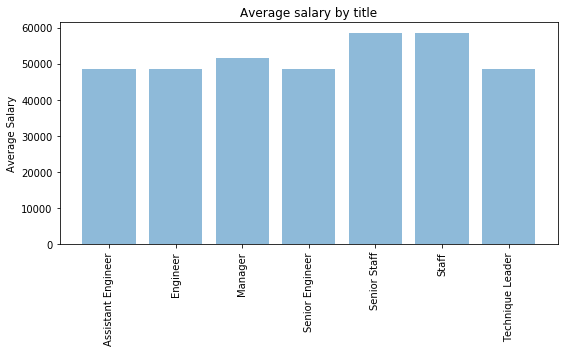

In [54]:
# Plotting a bar chart
x = grouped_data.keys().tolist()
y = grouped_data.values.tolist()

fig, ax = plt.subplots(figsize=(8,5))
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, rotation='vertical')
plt.ylabel('Average Salary')
plt.title('Average salary by title')
fig.tight_layout()
plt.show()